## Week 3 Day 4 Morning - Graphs

1) Afternoon lecture - review problems from packet <br>
2) Cafeteria office hours 12-2, lab/caf office hours 5-6 <br>
3) Tomorrow: Test 9-11 , Lecture 11-12 , Lecture 2-3. Boaz public lecture 3:30 (optional)

In [ ]:
%run "boaz_utils.ipynb"

# Graphs

Often in computation we have __data__ from the world, and a __question__ we want to answer about these data.

To do so, we need to find a __model__ for the data, and a way to translate our question into a __mathematical question about the model__

1) Have map of Addis, want to find fastest way to get from  national museum to market.<br>
2) Facebook is trying to figure out how many friends of friends does the average Ethiopean has. <br>
3) Geneticist is trying to find which genes relate to a certain colon cancer.

![title](addis_map.jpg)

What is perhaps most surprising is that these and any many other questions, all use the same mathematical model of a __graph__ 

A __graph__ is just a way to store __connections__ between pairs of entities:

The graph of Addis's roads could be composed of all street intersections, with a connection between intersection $u$ and intersection $v$ if they are directly connected by a road.

The Facebook graphs is composed of all Facebook users, with a connection between user $u$ and user $v$ if they are friends.

The gene-symptom interaction graph is composed of all genes and all "symptoms" (also known as phenotypes: some observable differences in people), where gene $u$ is connected to symptom $v$ if there is a correlation between people having the gene $u$ and symptom $v$. 

Mathematically, a graph is a set $V$ of __vertices__ and a set $E$ of pairs of these vertices which is known as the set of __edges__. We say that a vertex $u\in V$ is connected to $v\in V$ if the pair $(u,v)$ is in $E$.

A graph where $(u,v)\in E$ if and only if $(v,u)\in E$ is known as an __undirected__ graphs. Undirected graphs form an important special case, and we will mostly be interested in those graphs. 

Sometimes the edges (or vertices) of the graph are __labeled__ (often by a number), for example in the case of the road network, we might label every road segment with the average time it takes to travel from one end to the other.

There are two main representations for graphs. We can always assume the vertices are simply identified by the numbers $1$ to $n$ for some $n$. 

The __adjacency list representation__ is an array $L$ where $L[i]$ is the list of all neighbors of the vertex $i$ (i.e., all $j$ such that $(i,j)\in E$)

The __adjacency matrix representation__ is an $n\times n$ two-dimensional array $M$ (i.e., matrix) such that $M[i][j]$ equals $1$ if $j$ is a neighbor of $i$ and equals $0$ otherwise.

### Questions

* If a graph has $n$ vertices and $m$ edges - how big is its adjacency list representation? how big  is its adjacency matrix representation?

* Given a graph $G$ on $n$ vertices and two vertices $i,j$, how long can it take us (in the worst case) to find out if $j$ is a neighbor of $i$ when $G$ is represented in the adjacenecy list form? How long will it take in the adjacenecy matrix form?

### Examples:

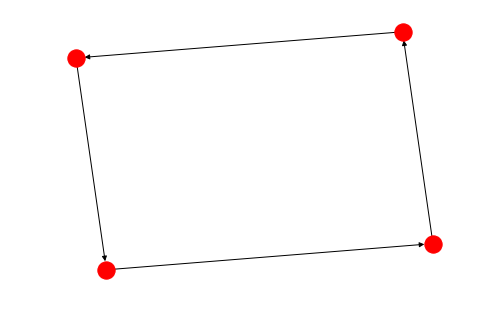

In [45]:
G = [[1],[2],[3],[0]]
draw_graph(G)

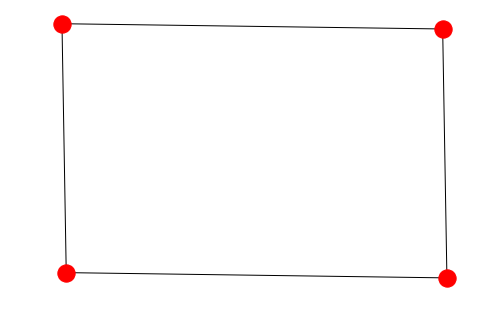

In [50]:
G = [[3,1],[0,2],[1,3],[2,0]]
draw_graph(G)

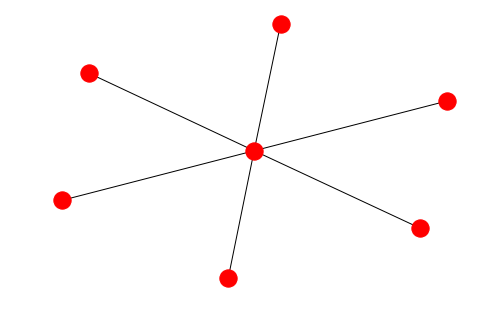

In [54]:
G = [[1,2,3,4,5,6],[0],[0],[0],[0],[0],[0]]
draw_graph(G)

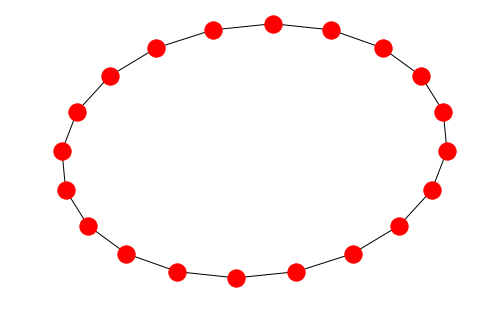

In [55]:
n = 20
cycle = [ [(i+1) % n, (i-1) % n] for i in range(n) ]
draw_graph(cycle)

In [ ]:
def grid_neighbors(i,j,n):
    if i==n-1 and j== n-1: return []
    if i==n-1:
        return [i*n+j+1]
    if j==n-1:
        return [(i+1)*n+j]
    return [n*i+((j+1) % n), n*((i+1) % n)+j] 

In [56]:
n = 5
grid = [ grid_neighbors(i,j,n) for i in range(n) for j in range(n)  ]

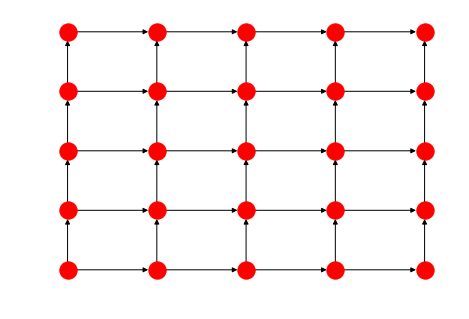

In [57]:
draw_graph(grid,'grid_layout')

# Basic graph functions

In [58]:
def neighbors(G,u): return G[u]

def isedge(G,u,v):
    return v in neighbors(G,u)

def vertices(G):
    return list(range(len(G)))

def addedge(G,i,j): 
    if not j in G[i]: G[i].append(j)
        
def emptygraph(n): 
    return [[] for i in range(n)]

In [61]:
neighbors(cycle,0)

[1, 19]

In [63]:
isedge(cycle,4,7)

False

In [64]:
vertices(cycle)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
def zeros(n): return [0 for i in range(n)]
def printmatrix(M):
    for L in M:
        print(L)
        
def list2matrix(G):
    n = len(vertices(G))
    M = [zeros(n) for i in range(n)]
    for i in range(n):
        for j in range(n):
            if isedge(G,i,j):
                M[i][j] = 1
            else:
                M[i][j] = 0
    return M

__Question:__ Write function `list2matrix(G)` that convertes a graph `G` in adj list format to adj matrix format where `M[i][j]` equals `1`/`0` based on whether `i` is neighbor of `j`

In [65]:
G = [[3,1],[0,2],[1,3],[2,0]]
M = list2matrix(G)
printmatrix(M)

[0, 1, 0, 1]
[1, 0, 1, 0]
[0, 1, 0, 1]
[1, 0, 1, 0]


In [71]:
def list2matrix(G):
    n = len(vertices(G))
    M = [[0 for i in range(n)] for j in range(n)]
    for i in vertices(G):
        for j in vertices(G):
            if isedge(G,i,j):
                (M[i])[j]=1
    return M
G = [[1,4],[0,2],[1,3],[2,4],[3,0]]
printmatrix(list2matrix(G))

[0, 1, 0, 0, 1]
[1, 0, 1, 0, 0]
[0, 1, 0, 1, 0]
[0, 0, 1, 0, 1]
[1, 0, 0, 1, 0]


## Example: Make graph undirected

__Exercise:__ Write a function `undir` that takes a graph `G` and outputs a graph `_G` that such that for every `i,j` the edge `i->j` is in `G` if and only if both  `j->i`  and `i->j` are in `_G`.

In [ ]:
def undir(G):
    _G = [[] for i in vertices(G)]
    for i in vertices(G):
        for j in neighbors(G,i):
            addedge(_G,i,j)
            addedge(_G,j,i)
    return _G

In [78]:




G = [[1],[2],[0]]
undir(G)

[[1, 2], [0, 2], [1, 0]]

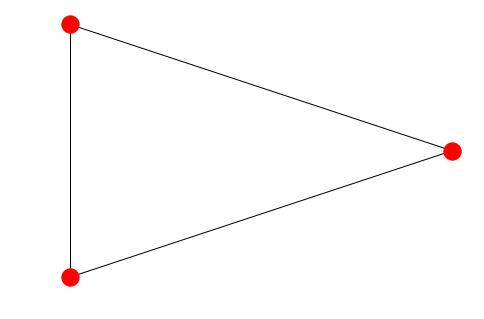

In [79]:
draw_graph(undir(G))